In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
import os as os
import pandas as pd
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
vaild_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)#disease

In [3]:
print("Total number of disease are: {}".format(len(diseases)))

Total number of disease are: 38


In [4]:
plants = []
number_of_diseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        number_of_diseases += 1

In [5]:
print(f"The unique Plants are: \n{plants}")
print("Number of diseases: {}".format(number_of_diseases))

The unique Plants are: 
['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']
Number of diseases: 26


In [6]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# convert it into pandas dataframe
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["number of images"])
img_per_class

,number of images
Tomato___Late_blight,1851
Tomato___healthy,1926
Grape___healthy,1692
Orange___Haunglongbing_(Citrus_greening),2010
Soybean___healthy,2022
Squash___Powdery_mildew,1736
Potato___healthy,1824
Corn_(maize)___Northern_Leaf_Blight,1908
Tomato___Early_blight,1920
Tomato___Septoria_leaf_spot,1745


Text(0.5, 1.0, 'Images per each class of plant disease')

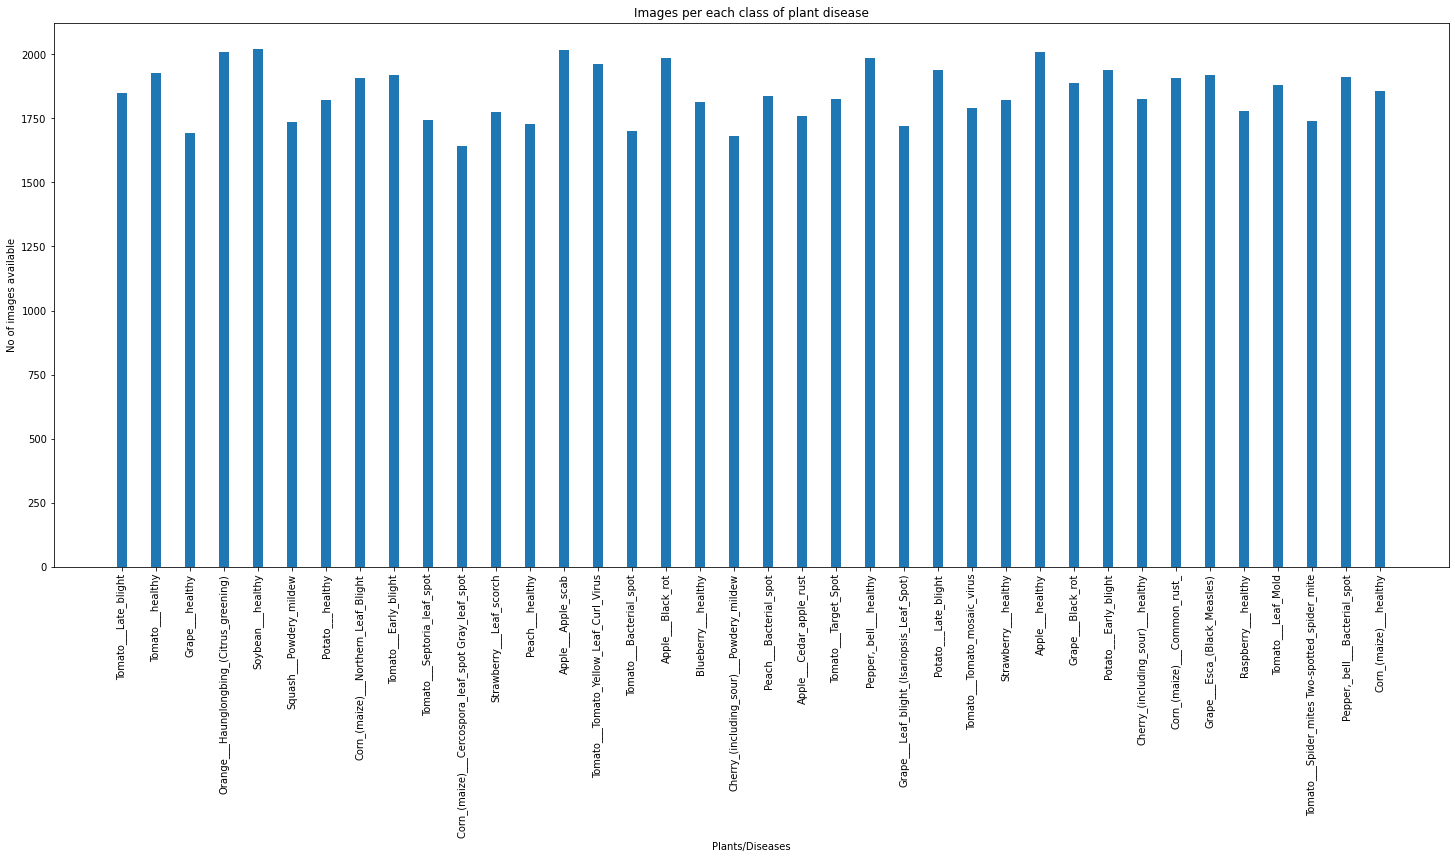

In [7]:
index = [n for n in range(38)]
plt.figure(figsize=(25, 10))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=10, rotation=90)
plt.title('Images per each class of plant disease')

<h1>Data Loading</h1>
<p>Setting up Image Data Generators<p>

In [8]:
train_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)

train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


<h1>Data Engineering</h1>
<p>Since the data is already augmented, there is no requirement of data engineering. Feature scaling is automatically done by image generators</p>

In [10]:
from tensorflow.keras.optimizers import Adam

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       7

In [11]:
ep = 10
history = model.fit_generator(train_gen,validation_data=test_gen,epochs = ep)

Epoch 1/10
2197/2197 [==============================] - 197s 86ms/step - loss: 1.9717 - accuracy: 0.4329 - val_loss: 0.7385 - val_accuracy: 0.7690
Epoch 2/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.4877 - accuracy: 0.8445 - val_loss: 0.2947 - val_accuracy: 0.9013
Epoch 3/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.2811 - accuracy: 0.9084 - val_loss: 0.2804 - val_accuracy: 0.9078
Epoch 4/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.1906 - accuracy: 0.9373 - val_loss: 0.1816 - val_accuracy: 0.9418
Epoch 5/10
2197/2197 [==============================] - 181s 82ms/step - loss: 0.1501 - accuracy: 0.9498 - val_loss: 0.1774 - val_accuracy: 0.9441
Epoch 6/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.1116 - accuracy: 0.9629 - val_loss: 0.1393 - val_accuracy: 0.9554
Epoch 7/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.0930 - accuracy: 0.9689 - val_loss: 0

<h1>Metrics</h1>

*********************************************************************


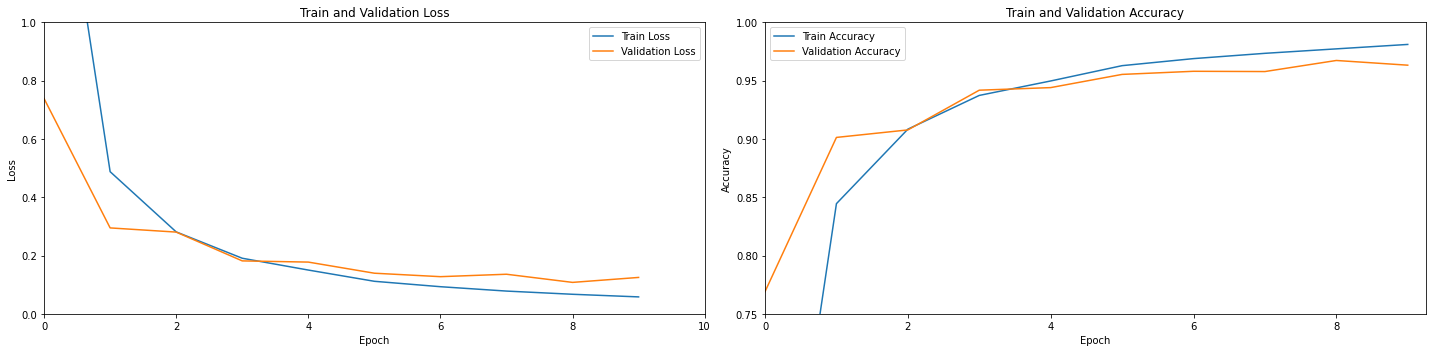

In [12]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()
print("*********************************************************************")
plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [13]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [14]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [15]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.11 %
Test Accuracy   : 96.33 %
Precision Score : 96.33 %
Recall Score    : 96.33 %


<h3>Confusion Matrix</h3>

<Figure size 1440x360 with 0 Axes>

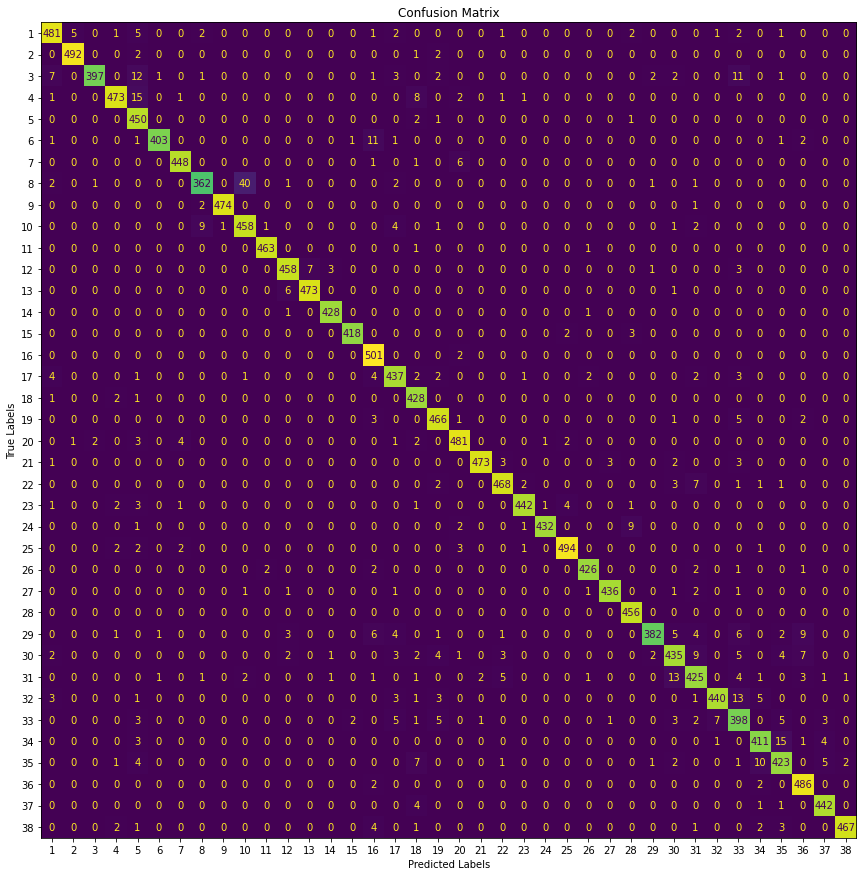

In [16]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
model.save('plant.h5')
print('saved')

saved


In [18]:
class_names = sorted(os.listdir(train_dir))
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('/kaggle/working/plant.h5')

def test_model(model, image_path, class_names):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_idx]

    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class_name}')
    plt.show()

    return predicted_class_name

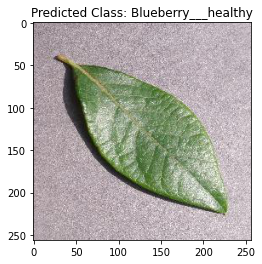

In [20]:
image_path = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy/00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681_180deg.JPG'
predicted_class = test_model(model, image_path, class_names)

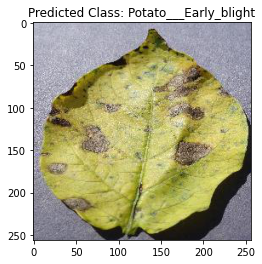

In [21]:
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight4.JPG'
predicted_class = test_model(model, image_path, class_names)

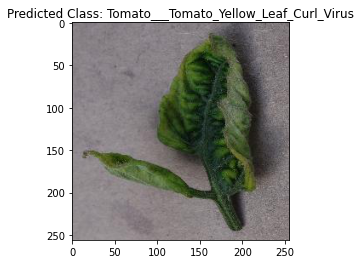

In [22]:
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus3.JPG'
predicted_class = test_model(model, image_path, class_names)

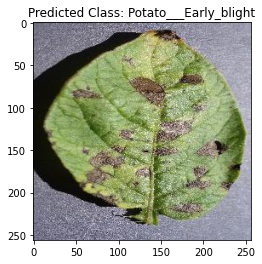

In [23]:
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight2.JPG'
predicted_class = test_model(model, image_path, class_names)

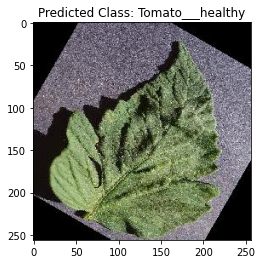

In [24]:
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/TomatoHealthy3.JPG'
predicted_class = test_model(model, image_path, class_names)

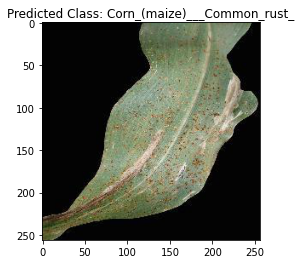

In [25]:
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG'
predicted_class = test_model(model, image_path, class_names)

In [26]:
import tensorflow as tf
import cv2
import os

model = tf.keras.models.load_model('/kaggle/working/plant.h5')


test_images_dir = '/kaggle/input/new-plant-diseases-dataset/test/test'

image_files = [f for f in os.listdir(test_images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

target_input_size = (256, 256)

for image_file in image_files:
    image_path = os.path.join(test_images_dir, image_file)
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_input_size)  # Resize to the target size
    image = image / 255.0  # Normalize the pixel values
    
    predictions = model.predict(tf.convert_to_tensor([image]))
    
    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
    
    predicted_class_label = class_names[predicted_class_index]
    
    print(f"Image: {image_file}, Predicted Label: {predicted_class_label}")

Image: TomatoEarlyBlight6.JPG, Predicted Label: Tomato___Target_Spot
Image: TomatoYellowCurlVirus4.JPG, Predicted Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: TomatoYellowCurlVirus6.JPG, Predicted Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: PotatoHealthy2.JPG, Predicted Label: Potato___healthy
Image: TomatoYellowCurlVirus5.JPG, Predicted Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: PotatoEarlyBlight2.JPG, Predicted Label: Potato___Early_blight
Image: TomatoYellowCurlVirus3.JPG, Predicted Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: TomatoEarlyBlight3.JPG, Predicted Label: Tomato___Early_blight
Image: CornCommonRust2.JPG, Predicted Label: Corn_(maize)___Common_rust_
Image: AppleScab3.JPG, Predicted Label: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Image: TomatoEarlyBlight5.JPG, Predicted Label: Tomato___Early_blight
Image: TomatoHealthy2.JPG, Predicted Label: Tomato___healthy
Image: CornCommonRust1.JPG, Predicted Label: Corn_(maize)___Common_rust